In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('C:/workspace/Python/머신러닝 플젝/hotel_bookings_cancel.csv', header = 0)

In [3]:
# reservation_status 열 제거

df = df.drop(['reservation_status'], axis = 1)

# chilsdren, babies 의 결측치 제거한 후 둘의 수를 더한 후, 자녀의 유무를 0, 1로 나타낸 
# kids 열 생성.

df['children'] = df['children'].fillna(0)
df['babies'] = df['babies'].fillna(0)
df["kids"] = df["children"] + df["babies"]
df.loc[df.kids != 0, 'kids'] = 1

# total_guest열 생성.
df['total_guest'] = df['adults'] + df['children'] +df['kids']

# agent 결측치 제거 후 agent의 유무를 0, 1 로 나타냄.
df['agent'] = df['agent'].fillna(0)
df.loc[df.agent != 0,'agent'] = 1 #df[df.loc[df['agent'] != 0]] = 1

In [4]:
# 전처리 끝난 후 원본 데이터를 건드리지 않는 ml 데이터를 따로 만듦.
# (특성 가변적으로 선택하기 위해)

df_ml = df.drop(["adults", "children", "babies", "assigned_room_type", "reserved_room_type","arrival_date_day_of_month", "required_car_parking_spaces", "total_of_special_requests"], axis = 1)
print(df.shape, df_ml.shape)

(119390, 25) (119390, 17)


df["total_guest"] = df["adults"] + df["children"] + df["babies"]
df.shape
df["total_nights"] = df["stays_in_weekend_nights"]+ df["stays_in_week_nights"]

In [5]:
over = RandomOverSampler()

In [6]:
# X와 y 만들고, 범주형 변수를 머신러닝에 활용하기 위해 더미화.
# 훈련, 테스트 셋으로 만들기.

X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


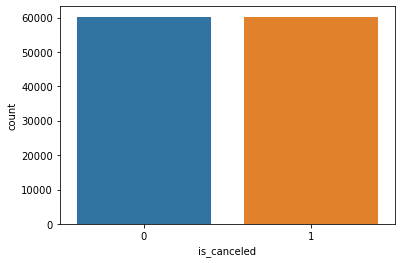

In [7]:
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

sns.countplot(y_train);

In [8]:
y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7376647740478799
평가 데이터 점수 : 0.7501884579948069


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [11]:
# X, y 나누고 더미화, 오버샘플링(복원추출 통해 0, 1 값 균등하게 맞추기.)
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7385114719261546
평가 데이터 점수 : 0.7475919256219113


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 앞쪽 특성부터 하나하나 적용한 결과.
for i in range(2,17):
    X = df_ml.iloc[:, 1:i]
    y = df_ml.iloc[:, 0]
    
    X = pd.get_dummies(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    X_train, y_train = over.fit_resample(X_train, y_train)
    df_sample = pd.DataFrame(X_train, columns=X_train.columns)
    
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    print("앞쪽부터", i, "개 특성을 적용한 train-score: {:.3f}".format(lr.score(X_train, y_train)))
    print("앞쪽부터", i, "개 특성을 적용한 test-score: {:.3f}".format(lr.score(X_test, y_test)))

앞쪽부터 2 개 특성을 적용한 train-score: 0.613
앞쪽부터 2 개 특성을 적용한 test-score: 0.640
앞쪽부터 3 개 특성을 적용한 train-score: 0.621
앞쪽부터 3 개 특성을 적용한 test-score: 0.641
앞쪽부터 4 개 특성을 적용한 train-score: 0.623
앞쪽부터 4 개 특성을 적용한 test-score: 0.643
앞쪽부터 5 개 특성을 적용한 train-score: 0.620
앞쪽부터 5 개 특성을 적용한 test-score: 0.643


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 6 개 특성을 적용한 train-score: 0.628
앞쪽부터 6 개 특성을 적용한 test-score: 0.647


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 7 개 특성을 적용한 train-score: 0.649
앞쪽부터 7 개 특성을 적용한 test-score: 0.658


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 8 개 특성을 적용한 train-score: 0.649
앞쪽부터 8 개 특성을 적용한 test-score: 0.660


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 9 개 특성을 적용한 train-score: 0.661
앞쪽부터 9 개 특성을 적용한 test-score: 0.675


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 10 개 특성을 적용한 train-score: 0.666
앞쪽부터 10 개 특성을 적용한 test-score: 0.674


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 11 개 특성을 적용한 train-score: 0.683
앞쪽부터 11 개 특성을 적용한 test-score: 0.685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 12 개 특성을 적용한 train-score: 0.732
앞쪽부터 12 개 특성을 적용한 test-score: 0.752


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 13 개 특성을 적용한 train-score: 0.732
앞쪽부터 13 개 특성을 적용한 test-score: 0.751


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 14 개 특성을 적용한 train-score: 0.739
앞쪽부터 14 개 특성을 적용한 test-score: 0.755


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


앞쪽부터 15 개 특성을 적용한 train-score: 0.737
앞쪽부터 15 개 특성을 적용한 test-score: 0.753
앞쪽부터 16 개 특성을 적용한 train-score: 0.741
앞쪽부터 16 개 특성을 적용한 test-score: 0.748


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# 최종 확정된 데이터
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [15]:
# X, y 나누고 더미화, 오버샘플링(복원추출 통해 0, 1 값 균등하게 맞추기.), 스케일링
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

# X, y 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 오버샘플링
over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

# X 값 스케일링
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [16]:
# 랜덤포레스트 모델 적용
# 랜덤포레스트는 전처리가 필요 없으므로 스케일링 되지 않은 X값 사용.

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, max_depth  = 12, random_state = 42)
forest.fit(X_train, y_train)

print("train set score is {:.3f}".format(forest.score(X_train, y_train)))
print("test set score is {:.3f}".format(forest.score(X_test, y_test)))

train set score is 0.777
test set score is 0.765


In [61]:
# 랜덤포레스트 그리드 서치 통한 최적 매개변수 탐색.

params = { 'n_estimators' : [10, 25, 50, 75, 100, 200],
           'max_depth' : [4, 6, 8, 10, 12, 20]
            }

model = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 20, 'n_estimators': 200}
최고 예측 정확도: 0.8231


In [63]:
# 최적 매개변수 활용한 랜덤포레스트 모델의 교차검증
rf = RandomForestClassifier(max_depth = 12, n_estimators = 100, random_state = 42)
print('교차 검증 점수 : ',format(cross_val_score(estimator=rf ,X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)))

교차 검증 점수 :  [0.76724496 0.77131236 0.76761849 0.77138588 0.76980866]


In [64]:
cross_rf = cross_val_score(estimator = rf, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_rf.mean())

교차 검증 점수 평균:  0.7694740698475788


In [20]:
# 로지스틱 회귀모델 적용
# 로지스틱 회귀모델은 수학적 모델이므로 스케일링 된 것 활용.
# 임의의 매개변수 값 적용.

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10, random_state=42).fit(X_train_s, y_train)

print("train set score is {:.3f}".format(lr.score(X_train_s, y_train)))
print("test set score is {:.3f}".format(lr.score(X_test_s, y_test)))

train set score is 0.742
test set score is 0.753


In [21]:
# 로지스틱 회귀 그리드 서치 통한 최적 매개변수 탐색.

params = { 'C' : [0.001 , 0.1, 1, 10, 50, 75, 100, 200],
           'max_iter' : [100, 200, 300, 400, 500],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

grid_cv = GridSearchCV(LogisticRegression(random_state = 42), param_grid = params, cv=5, n_jobs = -1) 
grid_cv.fit(X_train_s, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
최고 예측 정확도: 0.7418


In [22]:
# 최적 매개변수 활용한 로지스틱 회귀 교차검증

lr = LogisticRegression(C = 0.1, max_iter = 100, solver = 'lbfgs', random_state = 42)
print('교차 검증 점수 : ',format(cross_val_score(estimator=lr ,X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)))
cross_lr = cross_val_score(estimator = lr, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_lr.mean())

교차 검증 점수 :  [0.74362912 0.7454138  0.74076534 0.73909434 0.73984145]
교차 검증 점수 평균:  0.7417488082990825


In [23]:
# knn 모델 예측.
# 시간이 너무 오래 걸리는데... 매개변수 그리드 서치를 할 수 있을까...? ㅎㅎ
# 데이터 간 거리를 사용하여 예측하므로 스케일링 후 활용.

kn = KNeighborsClassifier().fit(X_train_s, y_train)

print("train set score is {:.3f}".format(kn.score(X_train_s, y_train)))
print("test set score is {:.3f}".format(kn.score(X_test_s, y_test)))

train set score is 0.862
test set score is 0.757


In [24]:
# knn 교차검증

print('교차 검증 점수 : ',format(cross_val_score(estimator=kn ,X=X_train, y=y_train, cv=5, n_jobs=-1)))
cross_kn = cross_val_score(estimator = kn, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_kn.mean())

교차 검증 점수 :  [0.75313356 0.75383913 0.75599734 0.78421118 0.78736562]
교차 검증 점수 평균:  0.7669093681149377


In [25]:
# 결정트리
# 결정트리이므로 전처리 없이 활용함.

dt = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

print("train set score is {:.3f}".format(dt.score(X_train, y_train)))
print("test set score is {:.3f}".format(dt.score(X_test, y_test)))

train set score is 0.990
test set score is 0.785


In [26]:
# 결정트리 그리드서치

params = { 'criterion' : ['gini' , 'entropy'],
           'max_depth' : [4, 6, 8, 10, 12, 20],
         'splitter' : ['best', 'random']}

grid_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv=5, n_jobs = -1)
grid_cv.fit(X_train_s, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
최고 예측 정확도: 0.8040


In [27]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, splitter = 'best', random_state = 42).fit(X_train, y_train)
print("train set score is {:.3f}".format(dt.score(X_train, y_train)))
print("test set score is {:.3f}".format(dt.score(X_test, y_test)))

print('교차 검증 점수 : ',format(cross_val_score(estimator=dt ,X=X_train, y=y_train, cv=5, n_jobs=-1)))
cross_dt = cross_val_score(estimator = dt, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_dt.mean())

train set score is 0.851
test set score is 0.771
교차 검증 점수 :  [0.79447165 0.80011621 0.78845356 0.81928361 0.81828747]
교차 검증 점수 평균:  0.8041224999674503


In [55]:
# 랜덤포레스트 max_depth값 조정하면서 훈련/검증 셋 성능비교

score_train_rf = []
score_test_rf = []

for i in range(1, 20):
    forest = RandomForestClassifier(n_estimators = 100, max_depth = i, random_state = 42)
    forest.fit(X_train, y_train)
    
    score_train_rf.append(forest.score(X_train, y_train))
    score_test_rf.append(forest.score(X_test, y_test))

In [56]:
print(score_train_rf)
print(score_test_rf)

[0.6698127303516287, 0.6856592622107116, 0.68734435700767, 0.7368014742504233, 0.7444715609124415, 0.754084072118737, 0.7565494571172428, 0.7581183384799283, 0.7612727031244811, 0.7642859514559883, 0.7674735199389049, 0.7765381678121991, 0.7808131620015274, 0.789935916591958, 0.7984527011322509, 0.8081731248132284, 0.8193379154630275, 0.8297224159112794, 0.8410864295912608]
[0.7431108133009465, 0.7601139123879722, 0.762040371890443, 0.765600134014574, 0.7637574336209063, 0.7607421057039954, 0.7550046067509841, 0.7557165591758104, 0.7565122707094396, 0.7578105368958874, 0.7587318870927213, 0.7645531451545355, 0.7640924700561186, 0.770081246335539, 0.7727615378172377, 0.7758187452885501, 0.7800485802831058, 0.7825613535471982, 0.7856185610185108]


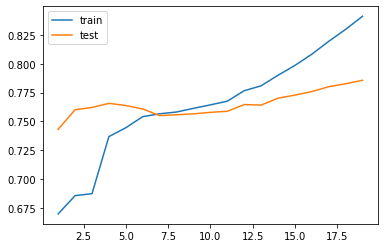

In [57]:
x_rf = range(1, 20)
plt.plot(x_rf, score_train_rf, label = 'train')
plt.plot(x_rf, score_test_rf, label = 'test')
plt.legend()
plt.show()

In [69]:
# 결정트리 max_depth값 조정하면서 훈련/검증 셋 성능비교

score_train_dt = []
score_test_dt = []

for i in range(1, 20):
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = i, splitter = 'best', random_state = 42)
    dt.fit(X_train, y_train)
    
    score_train_dt.append(dt.score(X_train, y_train))
    score_test_dt.append(dt.score(X_test, y_test))

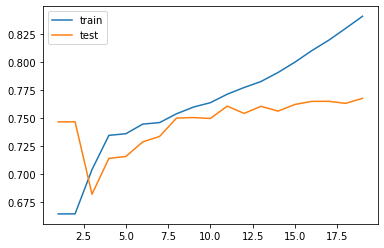

In [70]:
x_dt = range(1, 20)
plt.plot(x_dt, score_train_dt, label = 'train')
plt.plot(x_dt, score_test_dt, label = 'test')
plt.legend()
plt.show()

In [72]:
rf = RandomForestClassifier(max_depth = 20, n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

print("train set score is {:.3f}".format(rf.score(X_train, y_train)))
print("test set score is {:.3f}".format(rf.score(X_test, y_test)))

train set score is 0.856
test set score is 0.788


In [ ]:
# 자... 이렇게 돌려보고 드는 생각은
# 1. rf가 제일 나은 것 같다. 적당히 성능이 나온다.
# 2. 적당히 성능 나오면서 오버피팅 심하지 않은 매개변수 선택 (max_depth = 12) 하자.